# Fly wheel

We consider a pison that is connected to a fly wheel of radius $R$ by a link of length $l$. 



In [1]:
R = 1.0
l = 5.0

import numpy as np

In [2]:
def get_x(theta):
    
    ratio = R/l
    f = R*np.cos(theta) + l*np.sqrt(1.0-(ratio*np.sin(theta))**2)
    
    return f


def get_vx(theta, omega):
    f = 1.0 + ratio*np.cos(theta)/np.sqrt(1.0-(ratio*np.sin(theta))**2)
    return - f*R*omega*np.sin(theta)


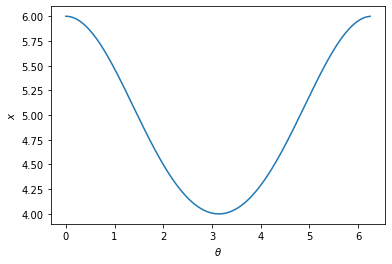

In [3]:
import pylab as plt

theta_data = np.arange(0.0, 2.0*np.pi, 2.0*np.pi/180.0)
x_data = [get_x(theta) for theta in theta_data]

plt.plot(theta_data, x_data)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$x$')
plt.show()


## Animation

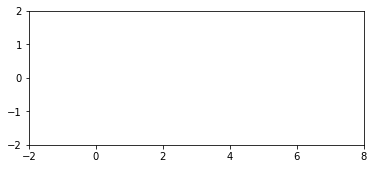

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML


fig, ax = plt.subplots()

ax.set_xlim([-2.0, 8.0])
ax.set_ylim([-2.0, 2.0])
ax.set_aspect(aspect=1)

joint, = ax.plot([], [], 'ro')
crank, = ax.plot([], [], lw='3', color='black')
rod, = ax.plot([], [], lw='3', color='black')


objs = [joint, crank, rod]


In [5]:
def init():
    for obj in objs:
        obj.set_data([], [])
    return objs

In [6]:
def animate(i):
    omega = 1.0
    dt = 2.0*np.pi / omega / 100.0
    t = i*dt
    theta = omega*t 
    
    joint.set_data([R*np.cos(theta)], [R*np.sin(theta)])
    crank.set_data([0.0, R*np.cos(theta)], [0.0, R*np.sin(theta)])
    
    x = get_x(theta)
    lead = 2.0
    piston = x + lead
    rod.set_data([R*np.cos(theta), x, piston, piston, piston], [R*np.sin(theta), 0.0, 0.0, 0.5, -0.5])
    
    return objs

In [7]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

In [8]:
HTML(anim.to_html5_video())